# Choose a Data Set
Use data gathered from one of the following APIs: 
- [TV Series Endpoints from TMDB (you cannot use any of the Movie endpoints!)](https://developer.themoviedb.org/reference/tv-series-airing-today-list)
- [Open Weather](https://openweathermap.org/api)
- [NASA API](https://api.nasa.gov/)
- [API Football](https://www.api-football.com/documentation-v3)
- [RAWG Video Games](https://rawg.io/apidocs)

**OR** 

Pick two or more datasets from one of the following folders: 
- [Olympic Games 2024](https://drive.google.com/drive/folders/1AqsNDn1HjdGBpj6CuxoGrog-Dg6Y_ecO?usp=sharing)
- [Diabetes Indicators](https://drive.google.com/drive/folders/1lXwQOk3oMVZRIDB_DuD8IhMh7rjERsFH?usp=drive_link)
- [Amazon Sales](https://drive.google.com/drive/folders/1VYUZ0vspKZQHgmbhe1qt-mjeeqVJJ58r?usp=drive_link)
- [NBA](https://drive.google.com/drive/folders/1tBGqAJTpXRtmETAjSNyba_kRWGR4JKHt?usp=drive_link)
- [Recipes](https://drive.google.com/drive/folders/18ybwQLoDTHF8EFfNtx9SxKco9Y4m9Z2I?usp=drive_link)


# My Question
 how close did we git for a large asteroid hitting us

# My Answer

Equation of the line: y = 0.00x + 87.26


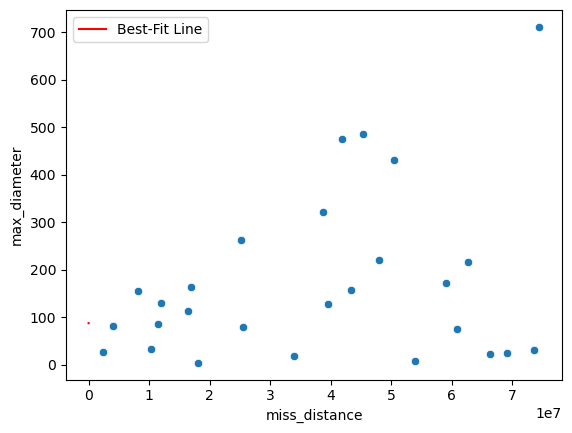

In [46]:
import pandas as pd
import seaborn as sns
import requests
import math
from scipy.stats import linregress
url = "https://api.nasa.gov/neo/rest/v1/feed?start_date=2014-09-07&end_date=2024-09-08&api_key=8fg8JupT35SHDkwp0yUHI9bQbF4rnAbgYF7MnpuG"
response = requests.get(url)
if response.status_code == 200:
    data = response.json() 
    neo_data = data['near_earth_objects']
    flattened_data = []
    for date, asteroids in neo_data.items():
        for asteroid in asteroids:
            max_diameter = asteroid['estimated_diameter']['meters']['estimated_diameter_max']
            miss_distance = asteroid['close_approach_data'][0]['miss_distance']['kilometers']
            flattened_data.append({
                'date': date,
                'max_diameter': max_diameter,
                'miss_distance': float(miss_distance)  # Convert to float for plotting
            })
    df = pd.DataFrame(flattened_data)        
    #print(df)#test code


    
    
df.head()

sns.scatterplot(data=df,y ="max_diameter",x = "miss_distance")
slope, intercept, r_value, p_value, std_err = linregress(df['miss_distance'], df['max_diameter'])
line_x = df['max_diameter']
line_y = slope * line_x + intercept
sns.lineplot(x=line_x, y=line_y, color='red', label='Best-Fit Line')
print(f'Equation of the line: y = {slope:.2f}x + {intercept:.2f}')# make the best fit line for the graphe comparing the miss distance and the max diameter

***Describe analysis here.***

<AxesSubplot:xlabel='miss_distance', ylabel='max_diameter'>

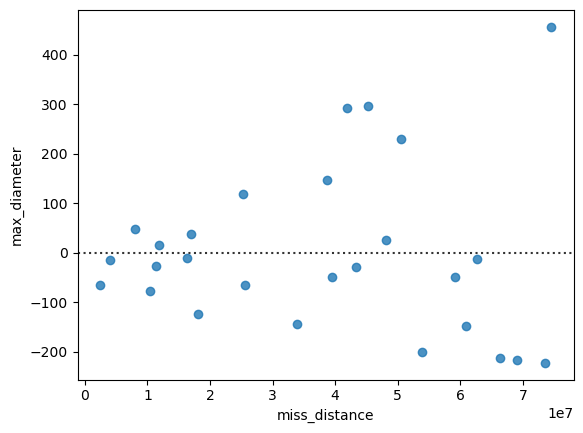

In [40]:
sns.residplot(data=df,y = "max_diameter",x = "miss_distance")#idk why thire is naggtive diameter but thire here.


***Describe analysis here.***

In [ ]:
we can see that most mass in it will normally be farther away this can be assumed that if something was that big it would probably be pulled in. The best fit line shows this with the graph  if something is above it they will be pulled in.
